<a href="https://colab.research.google.com/github/vikasbda21/Deep-Learning/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building an Image Classifier Using the Sequential API

In [1]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.7.0'

In [2]:
# Using Keras to load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

**Note:-** that the dataset is already split into a training set and a test set, but there is no
validation set, so we’ll create one now. Additionally, since we are going to train the
neural network using Gradient Descent, we must scale the input features. For simplicity,
we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
class_names[y_train[0]]

'Coat'

**Creating the model using the Sequential API**

In [7]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

Specifying activation="relu" is equivalent to specifying activa
tion=keras.activations.relu. Other activation functions are
available in the keras.activations package, we will use many of
them in this book. See https://keras.io/activations/ for the full list.



In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.layers

In [13]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [14]:
model.get_layer('dense') is hidden1

True

In [15]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.00062583,  0.00772033,  0.00122347, ...,  0.07087389,
         0.01392376,  0.01258229],
       [-0.02497114,  0.04140782,  0.06442155, ...,  0.01989983,
         0.06109831,  0.04357433],
       [ 0.04935662,  0.03454773, -0.01460455, ...,  0.06128328,
        -0.00070932, -0.0677584 ],
       ...,
       [-0.05984897, -0.03314474,  0.07316206, ..., -0.06342645,
        -0.02348742, -0.0411087 ],
       [-0.01410929, -0.03959286,  0.00351465, ...,  0.02291881,
        -0.07343539,  0.00984093],
       [-0.01765438,  0.01609089,  0.06272388, ...,  0.01551767,
         0.05483972,  0.01801164]], dtype=float32)

In [26]:
weights.shape

(784, 300)

In [17]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
biases.shape

(300,)

**Compiling the model**

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [20]:
history = model.fit(X_train, y_train, epochs=30,
validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7229 - accuracy: 0.7622 - val_loss: 0.5230 - val_accuracy: 0.8192
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4845 - accuracy: 0.8326 - val_loss: 0.4393 - val_accuracy: 0.8506
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4413 - accuracy: 0.8467 - val_loss: 0.4117 - val_accuracy: 0.8582
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4120 - accuracy: 0.8562 - val_loss: 0.3910 - val_accuracy: 0.8698
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3931 - accuracy: 0.8624 - val_loss: 0.3833 - val_accuracy: 0.8704
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3762 - accuracy: 0.8679 - val_loss: 0.3810 - val_accuracy: 0.8670
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3629 - accuracy: 0.8722 - val_loss: 0.3662 - val_accuracy:

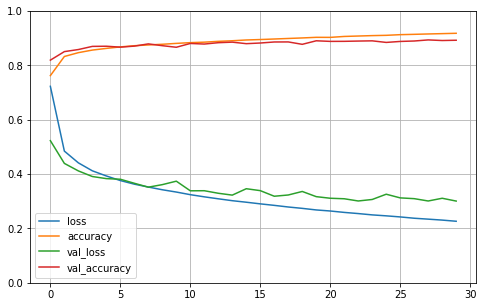

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 73.9317 - accuracy: 0.8366


[73.93167877197266, 0.8366000056266785]

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)